In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('Boston_House_Prices.csv')

In [81]:
df.isna().sum()

Rooms       0
Distance    0
Value       0
dtype: int64

In [82]:
df = df.drop_duplicates()

In [83]:
df

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


# Linear Reggression with Statsmodels

In [84]:
import statsmodels.api as sm

# 1.1 Simple Linear Regression

### 1.1.1 Define the dependent and independent variable

In [85]:
y = df['Value'] # Dependent variable
x = df['Rooms'] # Independent variable

### 1.1.2 Exploring the dataset

<Axes: xlabel='Rooms', ylabel='Value'>

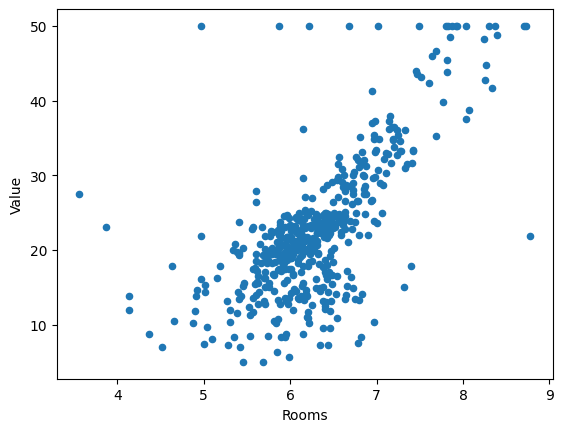

In [86]:
df.plot(kind='scatter', x='Rooms', y='Value')

## Making the regression: Adding a constant and fitting the model

In [87]:
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y, x).fit() # ftting the model

In [88]:
# predict
lm.predict(x)

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

## 1.1.4 The Regression Table

In [89]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           2.49e-74
Time:                        21:03:08   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1.1.5 Linear Regression Equation

In [90]:
# Rooms ceof: 9.1021
#Constant ceof: -34.6706

# Linear equation: y = ax + b
y_pred = 9.1021*x['Rooms'] - 34.6706

## 1.1.6 Plotting The Regression Line

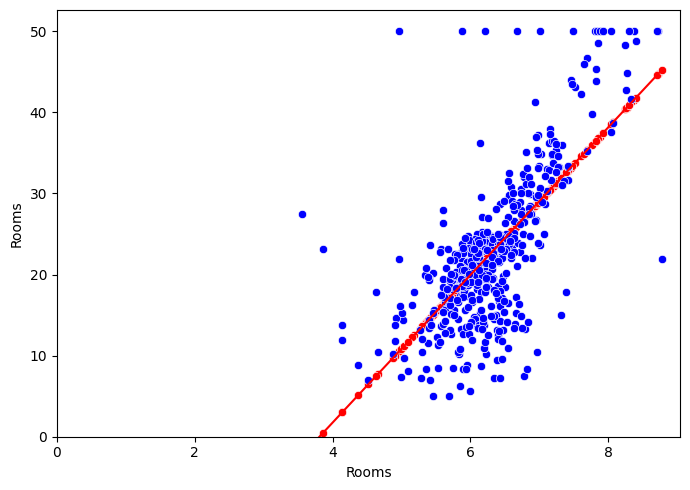

In [102]:
plt.figure(figsize=(7, 5), tight_layout=True)
sns.scatterplot(x=x['Rooms'], y=y_pred, color='red')
sns.scatterplot(x=x['Rooms'], y=y, color='blue')
sns.lineplot(x=x['Rooms'], y=y_pred, color='red')

plt.xlim(0)
plt.ylim(0)
plt.savefig('linear_regression')
plt.show()